<a href="https://colab.research.google.com/github/LeonelOctavio/Actividad2/blob/main/DataSet_Boston.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Contenido del dataset
Cada registro en la base de datos describe un suburbio o pueblo de Boston. Los datos se extrajeron del Área Estadística Metropolitana Estándar de Boston (SMSA) en 1970. Los atributos se definen de la siguiente manera (tomados del Repositorio de aprendizaje automático de UCI1):
CRIM: tasa de criminalidad per cápita por ciudad
ZN: proporción de suelo residencial zonificado para lotes de más de 25,000 pies cuadrados
INDUS: proporción de acres comerciales no minoristas por ciudad
CHAS: variable ficticia del río Charles (= 1 si el tramo limita con el río; 0 de lo contrario)
NOX: concentración de óxidos nítricos (partes por 10 millones)
https://archive.ics.uci.edu/ml/datasets/Housing

Cargue el conjunto de datos 124
RM: número promedio de habitaciones por vivienda
AGE: proporción de unidades ocupadas por propietarios construidas antes de 1940
DIS: distancias ponderadas a cinco centros de empleo  
BostonRAD: índice de accesibilidad a autopistas
radialesTAX: tasa de impuesto a la propiedad de valor total por $10,000
PTRATIO: alumno -proporción de maestros por ciudad 12.
B: 1000(Bk−0.63)2 donde Bk es la proporción de negros por ciudad 13.
LSTAT: % de estatus más bajo de la población
MEDV: valor medio de viviendas ocupadas por propietarios en miles de dólares
Podemos ver que los atributos de entrada tienen una mezcla de unidades.



In [46]:
# Importamos las librerias que vamos a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from pandas import read_csv

# Le damos formato al dataset con los nombres de cada columna
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('housing.csv', names=column_names)
data_copy = data.copy()

In [47]:
# Muestra las columnas del dataset con los nombres asignados
data_copy.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [48]:
#muestra las dimensiones del dataset
data_copy.shape

(506, 14)

In [49]:
# Muestra la informacion de las columnas y los tipos de datos
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [50]:
# Muestra estadisticas descriptivas de las columnas numéricas
data_copy.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [51]:
#Verificar valores nulos
data_copy.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [52]:
#Eliminamos los datos nullos (en esta ocasion no hay)
data_copy=data_copy.dropna()

In [53]:
#Checamos los tipos de datos de las columnas
data_copy.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [54]:
#Este bucle itera a través de los elementos del diccionario data, donde k representa la clave
#(nombre de la columna) y v representa los valores (columna de datos) correspondientes.
for k, v in data_copy.items():
    #calculamos el primer cuartil
    q1 = v.quantile(0.25)
    #calculamos el tercer cuartil
    q3 = v.quantile(0.75)
    #rango de  medida de dispersión de los datos.
    irq = q3 - q1
    # Filtra los valores en la columna v que se consideran valores atípicos. Se considera un valor atípico si
    #está por debajo de q1 - 1.5 * irq o por encima de q3 + 1.5 * irq.
    v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
    # Calcula el porcentaje de valores atípicos en la columna v en relación con el tamaño total del conjunto de datos.
    #Se utiliza np.shape para obtener el número de valores atípicos
    perc = np.shape(v_col)[0] * 100.0 / np.shape(data_copy)[0]
    #Imprime el nombre de la columna (k) y el porcentaje de valores atípicos (perc) en formato de cadena de texto
    print("Columna %s anomalias= %.2f%%" % (k, perc))

Columna CRIM anomalias= 13.04%
Columna ZN anomalias= 13.44%
Columna INDUS anomalias= 0.00%
Columna CHAS anomalias= 100.00%
Columna NOX anomalias= 0.00%
Columna RM anomalias= 5.93%
Columna AGE anomalias= 0.00%
Columna DIS anomalias= 0.99%
Columna RAD anomalias= 0.00%
Columna TAX anomalias= 0.00%
Columna PTRATIO anomalias= 2.96%
Columna B anomalias= 15.22%
Columna LSTAT anomalias= 1.38%
Columna MEDV anomalias= 7.91%


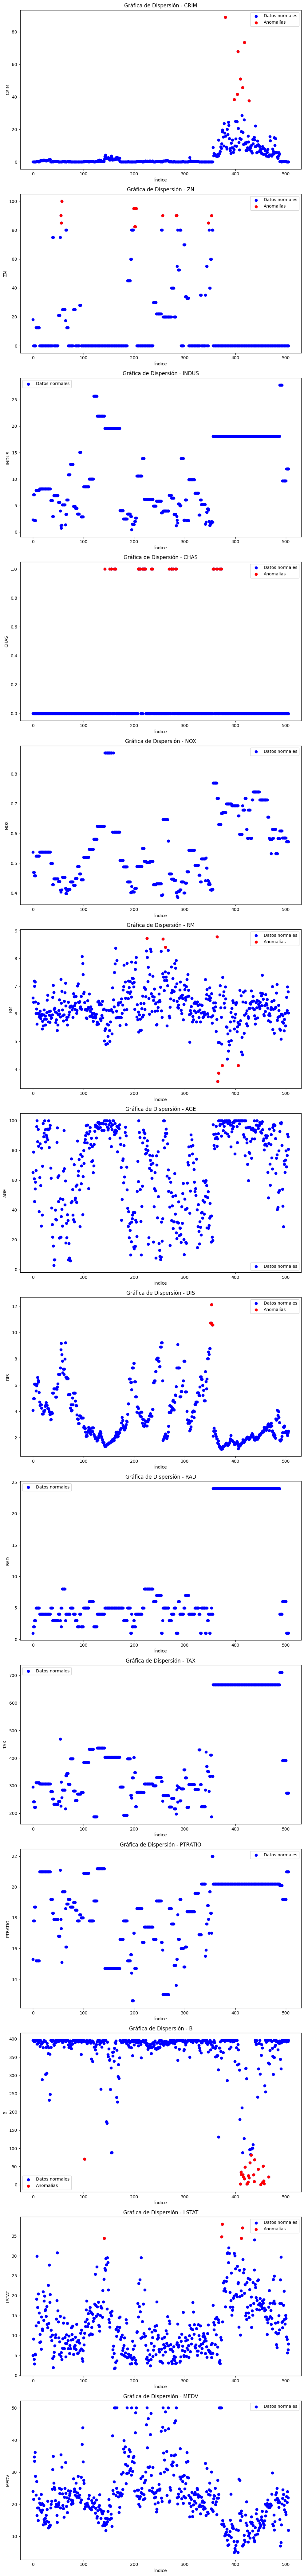

In [55]:
import matplotlib.pyplot as plt

# Crear una figura y un conjunto de ejes
fig, axes = plt.subplots(nrows=len(data_copy.columns), figsize=(10, 6*len(data.columns)))

# Iterar a través de cada columna de datos
for i, (column, values) in enumerate(data_copy.items()):
    # Calcular los límites para definir las anomalías (por ejemplo, ± 3 desviaciones estándar)
    anomaly_lower = values.mean() - 3 * values.std()
    anomaly_upper = values.mean() + 3 * values.std()

    # Crear una gráfica de dispersión de la columna de datos
    axes[i].scatter(range(len(values)), values, color='blue', label='Datos normales')

    # Filtrar y mostrar las anomalías en rojo
    anomalies = values[(values < anomaly_lower) | (values > anomaly_upper)]
    if len(anomalies) > 0:
        axes[i].scatter(anomalies.index, anomalies, color='red', label='Anomalías')

    # Configurar los límites y etiquetas de los ejes
    axes[i].set_ylabel(column)
    axes[i].set_xlabel('Índice')
    axes[i].set_title('Gráfica de Dispersión - {}'.format(column))
    axes[i].legend()

# Ajustar el espaciado entre subtramas
plt.tight_layout()

# Mostrar la gráfica
plt.show()


In [56]:
data_copy.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [57]:
y =  np.log1p(y)
for col in x.columns:
    if np.abs(x[col].skew()) > 0.3:
        x[col] = np.log1p(x[col])

In [58]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import cross_val_predict
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import pandas as pd

# Creación del modelo de regresión lineal
l_regression = linear_model.LinearRegression()

# Configuración de la validación cruzada con 10 splits
kf = KFold(n_splits=10)

# Escalado de las características
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)

# Almacenamiento de los resultados de las predicciones
results = pd.DataFrame({'Actual': y})

# Evaluación del modelo de regresión lineal
scores = cross_val_score(l_regression, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
y_pred_lr = cross_val_predict(l_regression, x_scaled, y, cv=kf)
results['Linear Regression'] = y_pred_lr

# Creación del modelo de regresión Ridge
l_ridge = linear_model.Ridge()

# Evaluación del modelo de regresión Ridge
scores = cross_val_score(l_ridge, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
y_pred_rr = cross_val_predict(l_ridge, x_scaled, y, cv=kf)
results['Ridge Regression'] = y_pred_rr

# Modelo de regresión polinomial con grado 3
poly_features = PolynomialFeatures(degree=3)
x_poly = poly_features.fit_transform(x_scaled)

model = make_pipeline(linear_model.Ridge())

# Evaluación del modelo de regresión polinomial
scores = cross_val_score(model, x_poly, y, cv=kf, scoring='neg_mean_squared_error')
y_pred_poly = cross_val_predict(model, x_poly, y, cv=kf)
results['Polynomial Ridge'] = y_pred_poly

# Imprimir el DataFrame con los resultados
print(results)


       Actual  Linear Regression  Ridge Regression  Polynomial Ridge
0    3.218876           3.505525          3.493302          3.387183
1    3.117950           3.273832          3.275813          3.231164
2    3.575151           3.534356          3.521158          3.499829
3    3.538057           3.506697          3.502677          3.450300
4    3.616309           3.409241          3.415539          3.437811
..        ...                ...               ...               ...
501  3.152736           3.210263          3.202798          3.175741
502  3.072693           3.219850          3.204533          3.138485
503  3.214868           3.435167          3.407273          3.410145
504  3.135494           3.375077          3.351612          3.333109
505  2.557227           3.253986          3.234797          3.158432

[506 rows x 4 columns]


In [59]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

# Creación del modelo de Regresión de Vectores de Soporte con kernel RBF y parámetros C y gamma predefinidos
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)

# Evaluación del modelo de Regresión de Vectores de Soporte
scores = cross_val_score(svr_rbf, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')

# Almacenamiento de los resultados en el diccionario scores_map
scores_map = {}
scores_map['SVR'] = scores

# Impresión del promedio y la desviación estándar del MSE
print("MSE SVR: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

# Ajuste del modelo de Regresión de Vectores de Soporte a todos los datos
svr_rbf.fit(x_scaled, y)

# Predicciones con el modelo ajustado
y_pred = svr_rbf.predict(x_scaled)

# Creación de una tabla con los valores actuales y los valores predichos
results = pd.DataFrame({'Actual': y, 'Predicted': y_pred})
print(results)


MSE SVR: -0.05 (+/- 0.05)
       Actual  Predicted
0    3.218876   3.318317
1    3.117950   3.192375
2    3.575151   3.530541
3    3.538057   3.521372
4    3.616309   3.501785
..        ...        ...
501  3.152736   3.150442
502  3.072693   3.065508
503  3.214868   3.272289
504  3.135494   3.206707
505  2.557227   3.046097

[506 rows x 2 columns]


In [60]:
from sklearn.tree import DecisionTreeRegressor

# Creación del modelo de Regresión por Árboles de Decisión con una profundidad máxima de 5
desc_tr = DecisionTreeRegressor(max_depth=5)

# Evaluación del modelo de Regresión por Árboles de Decisión
scores = cross_val_score(desc_tr, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')

# Almacenamiento de los resultados en el diccionario scores_map
scores_map['DecisionTreeRegressor'] = scores

# Impresión del promedio y la desviación estándar del MSE
print("MSE DecisionTreeRegressor: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

# Ajuste del modelo de Regresión por Árboles de Decisión a todos los datos
desc_tr.fit(x_scaled, y)

# Predicciones con el modelo ajustado
y_pred = desc_tr.predict(x_scaled)

# Creación de una tabla con los valores actuales y los valores predichos
results = pd.DataFrame({'Actual': y, 'Predicted': y_pred})
print(results)

MSE DecisionTreeRegressor: -0.05 (+/- 0.05)
       Actual  Predicted
0    3.218876   3.340577
1    3.117950   3.138238
2    3.575151   3.523274
3    3.538057   3.523274
4    3.616309   3.523274
..        ...        ...
501  3.152736   3.138238
502  3.072693   3.138238
503  3.214868   3.387708
504  3.135494   3.387708
505  2.557227   3.042449

[506 rows x 2 columns]


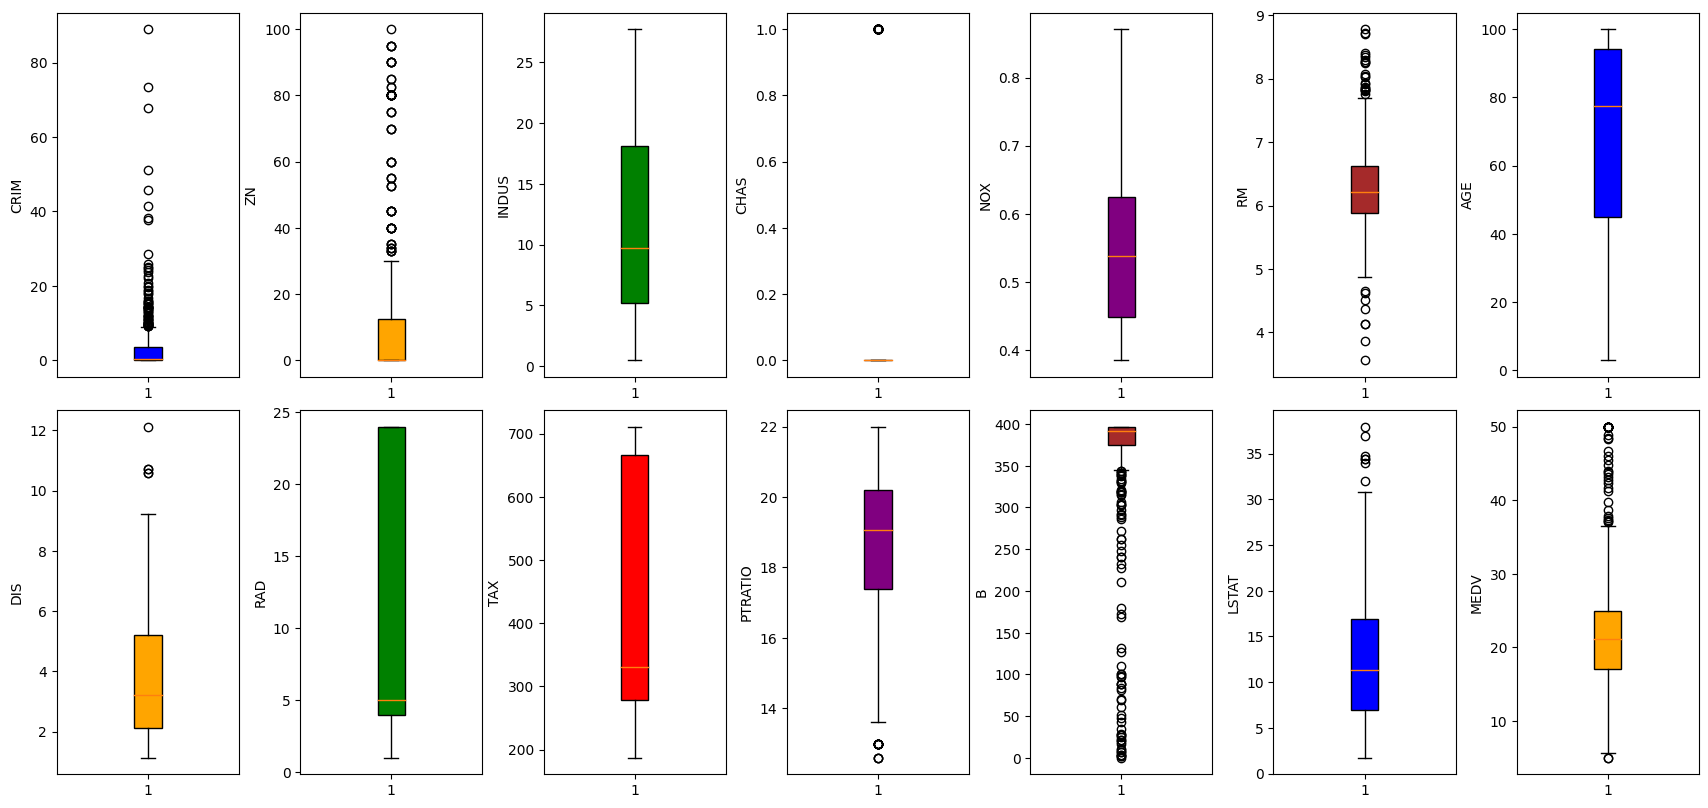

In [61]:
# Crear una figura con subplots
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(17, 8))
ax = ax.flatten()  # Aplanar los subplots en un arreglo unidimensional
index = 0  # Índice para recorrer los subplots
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown']  # Colores para los boxplots

# Iterar sobre las columnas del DataFrame
for i, column in enumerate(data.columns):
    # Crear el boxplot en el subplot correspondiente
    ax[index].boxplot(data[column], patch_artist=True, boxprops=dict(facecolor=colors[i % len(colors)]))
    ax[index].set_ylabel(column)  # Establecer el nombre de la columna en el eje y del subplot
    index += 1  # Incrementar el índice para pasar al siguiente subplot

plt.tight_layout(pad=0.4)  # Ajustar el espaciado entre subplots
plt.show()  # Mostrar la figura con los boxplots

In [62]:
from sklearn.neighbors import KNeighborsRegressor

# Creación del modelo de Regresión por Vecinos más Cercanos con 7 vecinos
knn = KNeighborsRegressor(n_neighbors=7)

# Evaluación del modelo de Regresión por Vecinos más Cercanos
scores = cross_val_score(knn, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')

# Almacenamiento de los resultados en el diccionario scores_map
scores_map['KNeighborsRegressor'] = scores

# Impresión del promedio y la desviación estándar del MSE
print("MSE KNeighborsRegressor: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

#Búsqueda del número óptimo de vecinos para el modelo de Regresión por Vecinos más Cercanos utilizando GridSearchCV
# grid_sv = GridSearchCV(knn, cv=kf, param_grid={"n_neighbors" : [2, 3, 4, 5, 6, 7]}, scoring='neg_mean_squared_error')
# grid_sv.fit(x_scaled, y)
# print("Best classifier :", grid_sv.best_estimator_)

MSE KNeighborsRegressor: -0.05 (+/- 0.04)


In [63]:
from sklearn.ensemble import GradientBoostingRegressor

# Creación del modelo de Regresión por Gradient Boosting con los parámetros especificados
gbr = GradientBoostingRegressor(alpha=0.9, learning_rate=0.05, max_depth=2, min_samples_leaf=5, min_samples_split=2, n_estimators=100, random_state=30)

# Evaluación del modelo de Regresión por Gradient Boosting
scores = cross_val_score(gbr, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')

# Almacenamiento de los resultados en el diccionario scores_map
scores_map['GradientBoostingRegressor'] = scores

# Impresión del promedio y la desviación estándar del MSE
print("MSE GradientBoostingRegressor: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

#Búsqueda de los mejores parámetros para el modelo de Regresión por Gradient Boosting utilizando GridSearchCV
# param_grid = {'n_estimators': [100, 200], 'learning_rate': [0.1, 0.05, 0.02], 'max_depth': [2, 4, 6], 'min_samples_leaf': [3, 5, 9]}
# grid_sv = GridSearchCV(gbr, cv=kf, param_grid=param_grid, scoring='neg_mean_squared_error')
# grid_sv.fit(x_scaled, y)
# print("Best classifier :", grid_sv.best_estimator_)


MSE GradientBoostingRegressor: -0.03 (+/- 0.03)


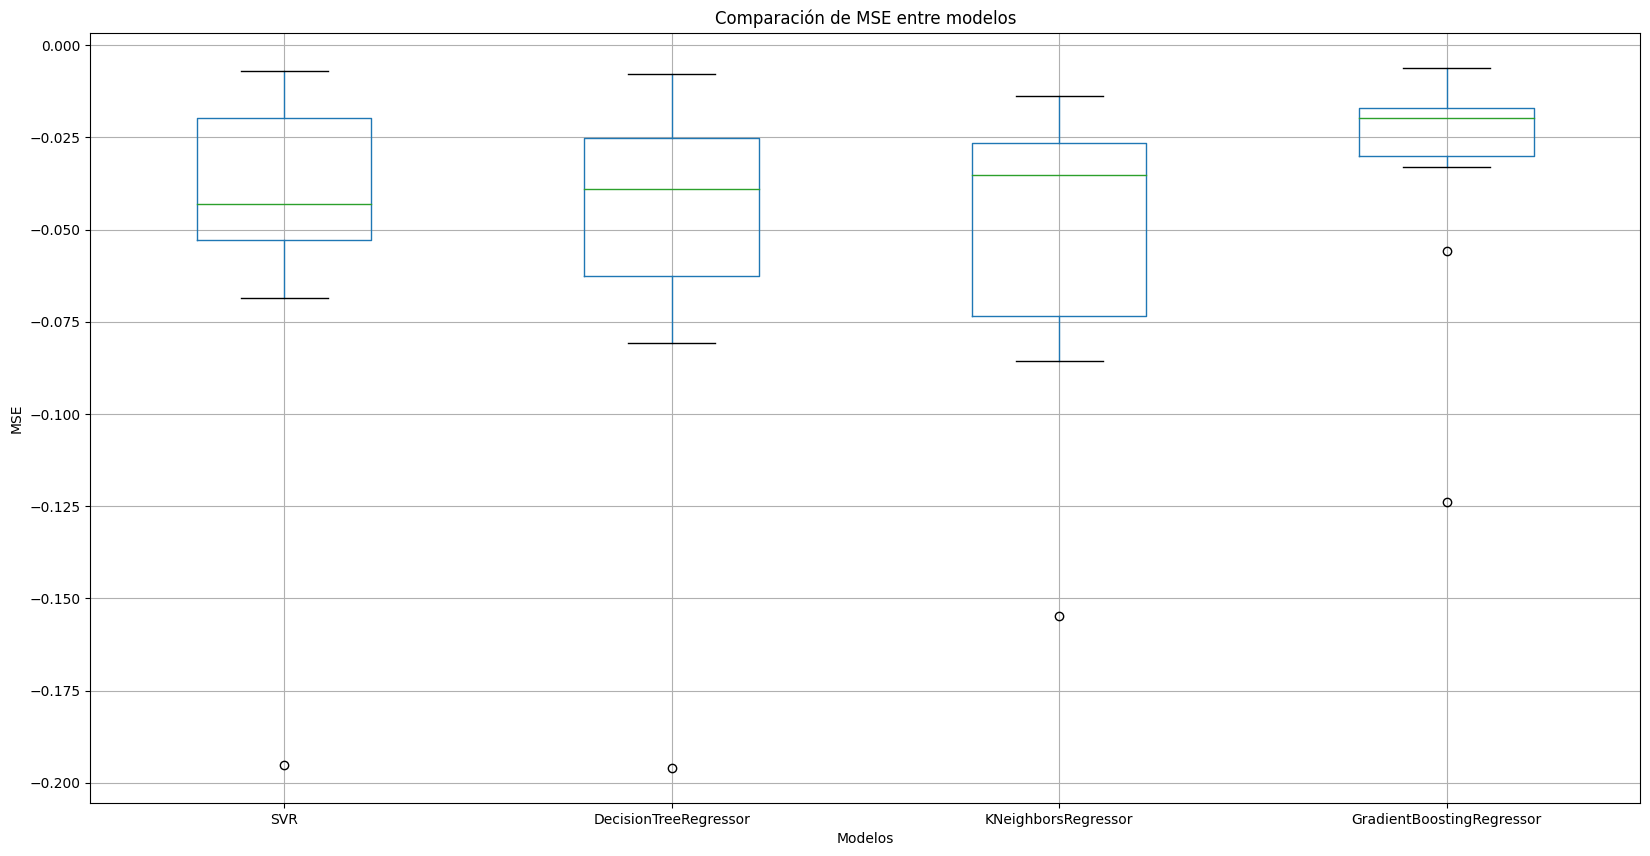

In [64]:
# Creación de la figura
plt.figure(figsize=(20, 10))

# Creación del gráfico de caja (boxplot) utilizando los datos almacenados en scores_map
scores_map = pd.DataFrame(scores_map)
scores_map.boxplot()

# Configuración de etiquetas y título del gráfico
plt.xlabel('Modelos')
plt.ylabel('MSE')
plt.title('Comparación de MSE entre modelos')

# Mostrar el gráfico
plt.show()

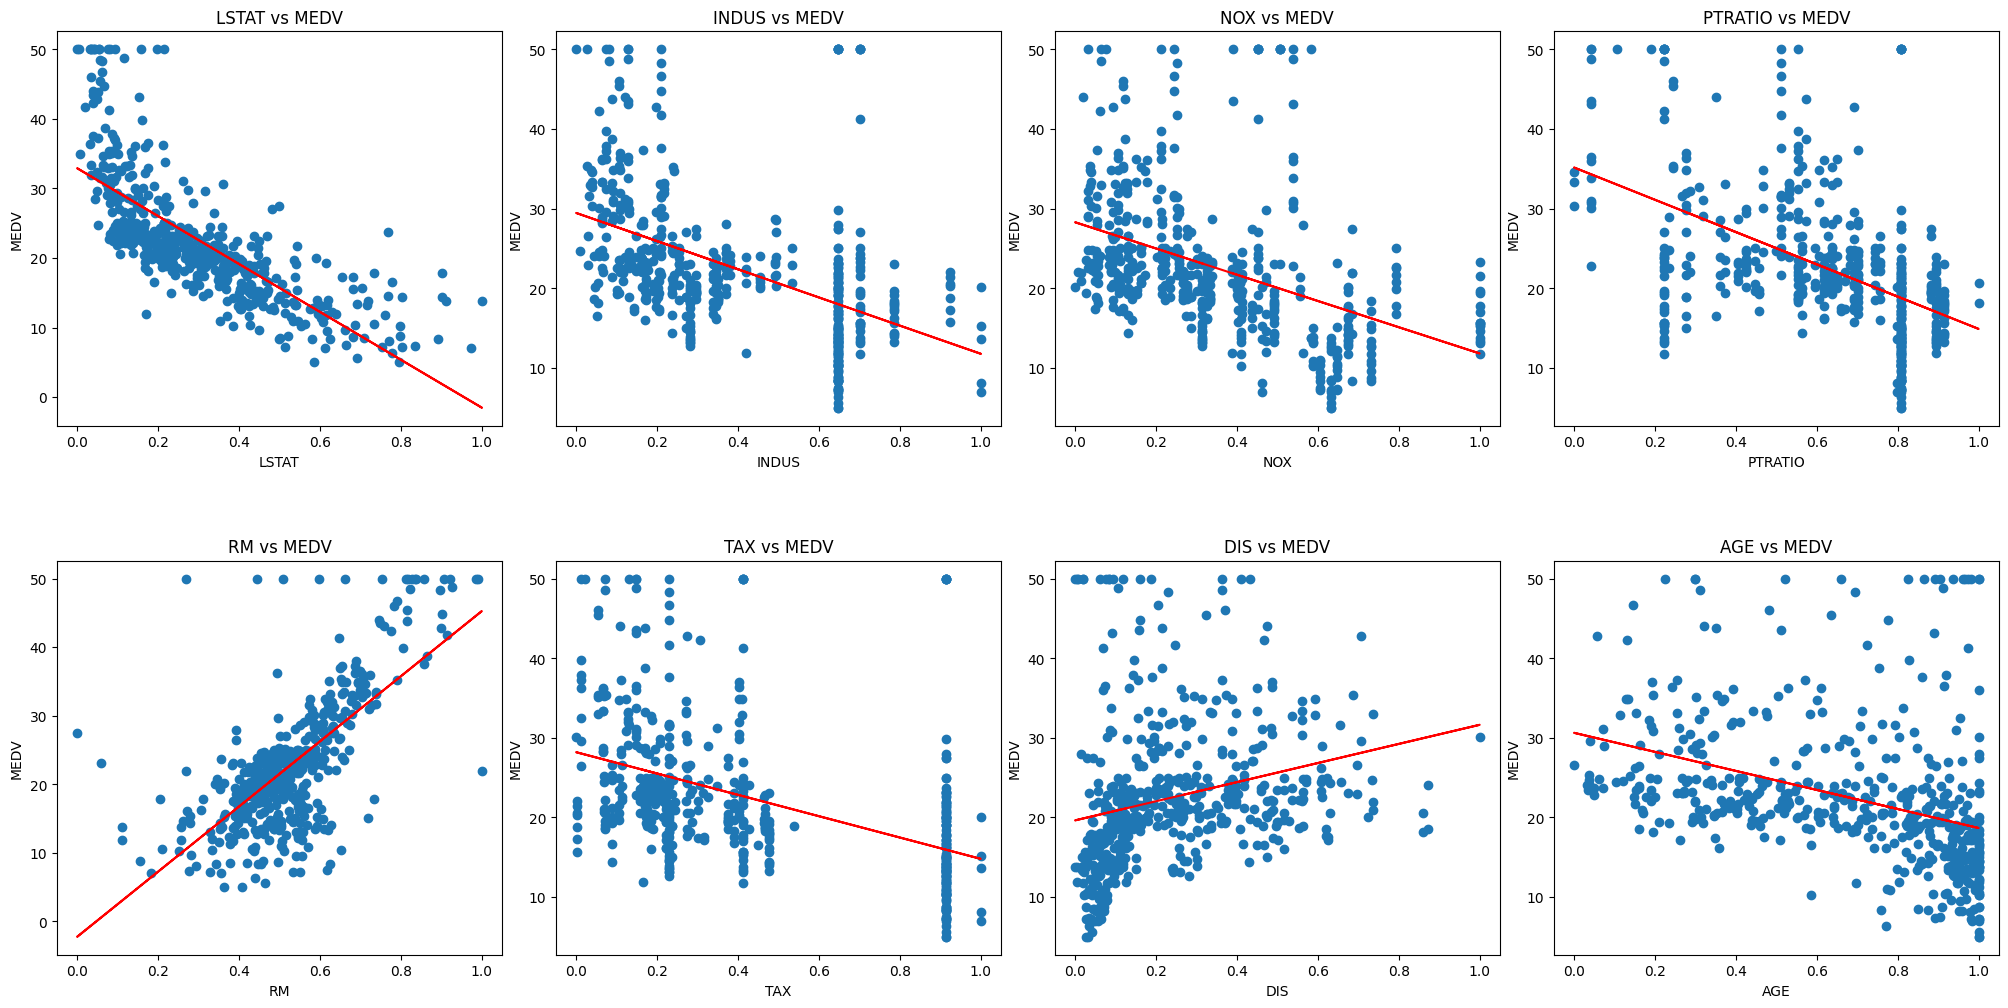

In [65]:
from sklearn import preprocessing
import pandas as pd
import matplotlib.pyplot as plt

# Escalado de columnas
min_max_scaler = preprocessing.MinMaxScaler()

# Selección de columnas
column_sels = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']

# Obtención de las columnas seleccionadas y la variable objetivo
x = data_copy.loc[:, column_sels]
y = data_copy['MEDV']

# Escalado de las columnas seleccionadas
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)

# Creación de la figura y los ejes
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()

# Creación de los gráficos de dispersión con regresión lineal
for i, k in enumerate(column_sels):
    axs[i].scatter(x[k], y)
    axs[i].set_xlabel(k)
    axs[i].set_ylabel('MEDV')
    axs[i].set_title(f'{k} vs MEDV')

    # Ajuste de la regresión lineal
    m, b = np.polyfit(x[k], y, 1)
    axs[i].plot(x[k], m * x[k] + b, color='red')

# Ajuste de la disposición de los gráficos
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

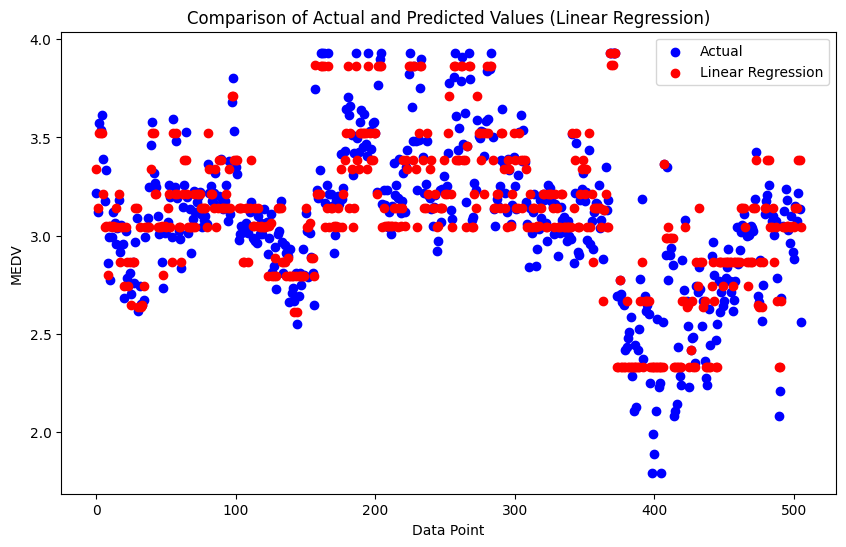

In [66]:
import matplotlib.pyplot as plt

# Plotting the comparison for Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(results.index, results['Actual'], color='blue', label='Actual')
plt.scatter(results.index, results['Predicted'], color='red', label='Linear Regression')
plt.xlabel('Data Point')
plt.ylabel('MEDV')
plt.title('Comparison of Actual and Predicted Values (Linear Regression)')
plt.legend()
plt.show()

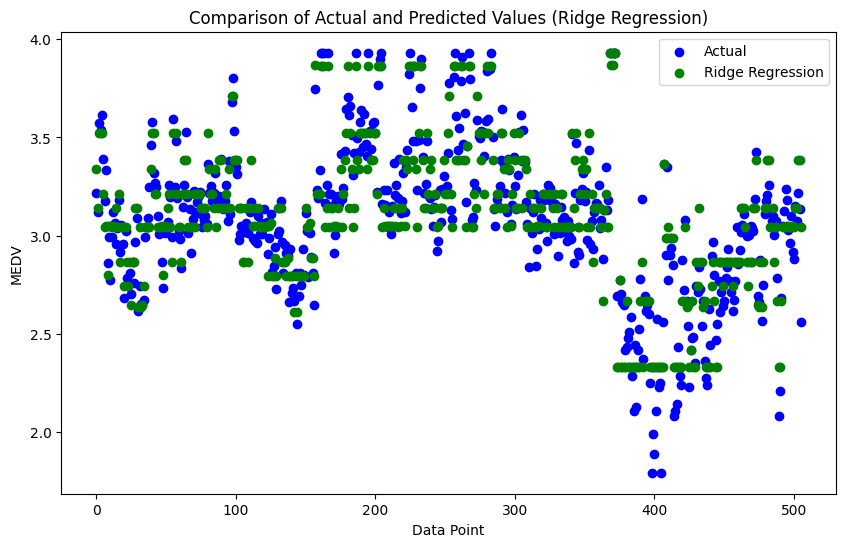

In [67]:
# Plotting the comparison for Ridge Regression
plt.figure(figsize=(10, 6))
plt.scatter(results.index, results['Actual'], color='blue', label='Actual')
plt.scatter(results.index, results['Predicted'], color='green', label='Ridge Regression')
plt.xlabel('Data Point')
plt.ylabel('MEDV')
plt.title('Comparison of Actual and Predicted Values (Ridge Regression)')
plt.legend()
plt.show()

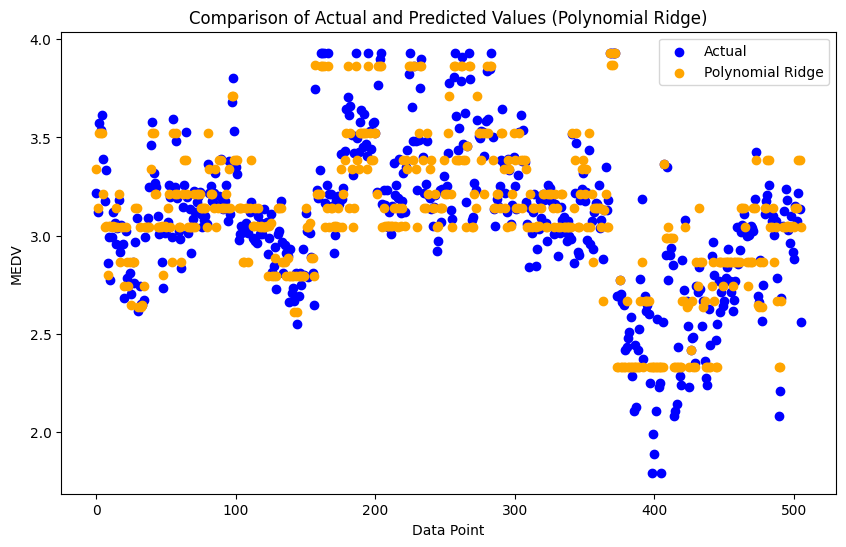

In [68]:

# Plotting the comparison for Polynomial Ridge
plt.figure(figsize=(10, 6))
plt.scatter(results.index, results['Actual'], color='blue', label='Actual')
plt.scatter(results.index, results['Predicted'], color='orange', label='Polynomial Ridge')
plt.xlabel('Data Point')
plt.ylabel('MEDV')
plt.title('Comparison of Actual and Predicted Values (Polynomial Ridge)')
plt.legend()
plt.show()

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# Le damos formato al dataset con los nombres de cada columna
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('housing.csv', names=column_names)
data_copy = data.copy()


In [70]:
# Grafica de correlación
#plt.figure(figsize=(10, 6))
#corr_matrix = data_copy.corr()
#plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
#plt.colorbar()
#plt.xticks(np.arange(len(column_names)), column_names, rotation=45)
#plt.yticks(np.arange(len(column_names)), column_names)
#plt.title('Matriz de correlación')
#plt.show()

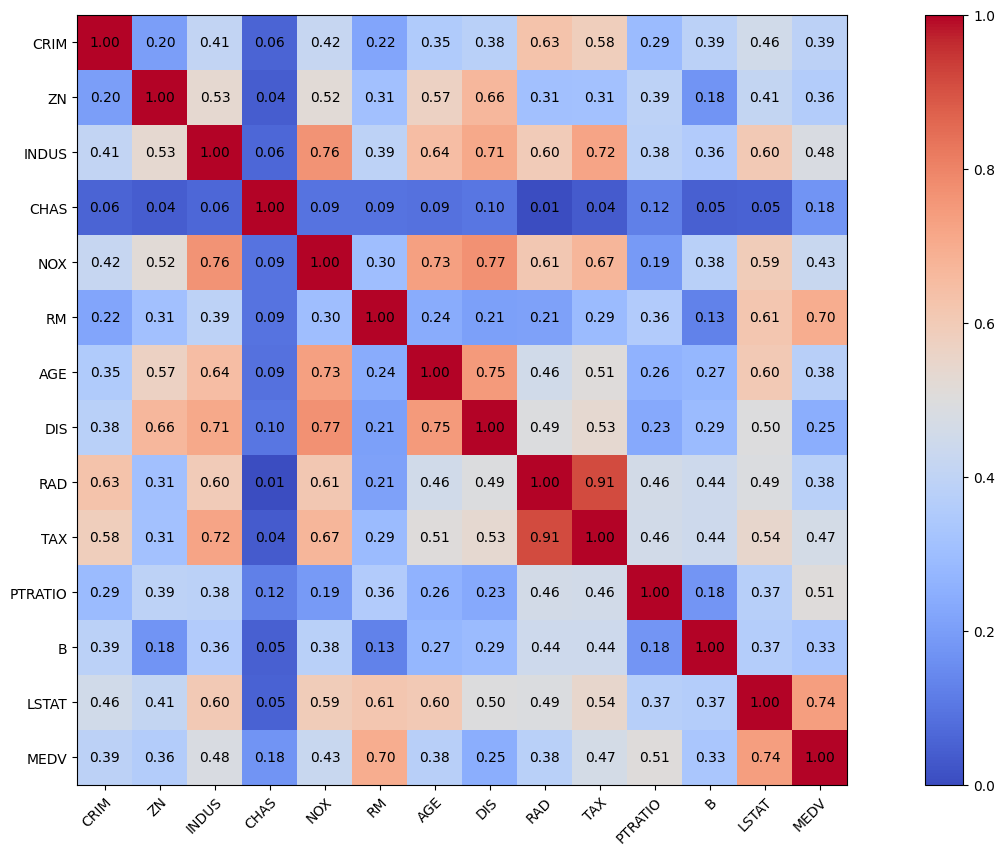

In [71]:
import numpy as np
import matplotlib.pyplot as plt

# Obtener la matriz de correlación
corr_matrix = data_copy.corr().abs().values

# Crear la figura y el objeto de los ejes
fig, ax = plt.subplots(figsize=(20, 10))

# Crear el mapa de calor con imshow
heatmap = ax.imshow(corr_matrix, cmap='coolwarm', vmin=0, vmax=1)

# Añadir las anotaciones
for i in range(corr_matrix.shape[0]):
    for j in range(corr_matrix.shape[1]):
        ax.annotate(f'{corr_matrix[i, j]:.2f}', xy=(j, i),
                    ha='center', va='center', color='black')

# Añadir la barra de color
cbar = ax.figure.colorbar(heatmap, ax=ax)

# Establecer etiquetas de los ejes
ax.set_xticks(np.arange(corr_matrix.shape[1]))
ax.set_yticks(np.arange(corr_matrix.shape[0]))
ax.set_xticklabels(data_copy.columns)
ax.set_yticklabels(data_copy.columns)

# Girar las etiquetas de los ejes x
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Mostrar la figura
plt.show()


In [72]:
# Matriz de correlación
print(corr_matrix)

[[1.         0.20046922 0.40658341 0.05589158 0.42097171 0.2192467
  0.35273425 0.37967009 0.62550515 0.58276431 0.28994558 0.38506394
  0.45562148 0.38830461]
 [0.20046922 1.         0.53382819 0.04269672 0.51660371 0.31199059
  0.56953734 0.66440822 0.31194783 0.31456332 0.39167855 0.17552032
  0.41299457 0.36044534]
 [0.40658341 0.53382819 1.         0.06293803 0.76365145 0.39167585
  0.64477851 0.70802699 0.59512927 0.72076018 0.38324756 0.35697654
  0.60379972 0.48372516]
 [0.05589158 0.04269672 0.06293803 1.         0.09120281 0.09125123
  0.08651777 0.09917578 0.00736824 0.03558652 0.12151517 0.04878848
  0.0539293  0.17526018]
 [0.42097171 0.51660371 0.76365145 0.09120281 1.         0.30218819
  0.7314701  0.76923011 0.61144056 0.6680232  0.18893268 0.38005064
  0.59087892 0.42732077]
 [0.2192467  0.31199059 0.39167585 0.09125123 0.30218819 1.
  0.24026493 0.20524621 0.20984667 0.29204783 0.35550149 0.12806864
  0.61380827 0.69535995]
 [0.35273425 0.56953734 0.64477851 0.086517

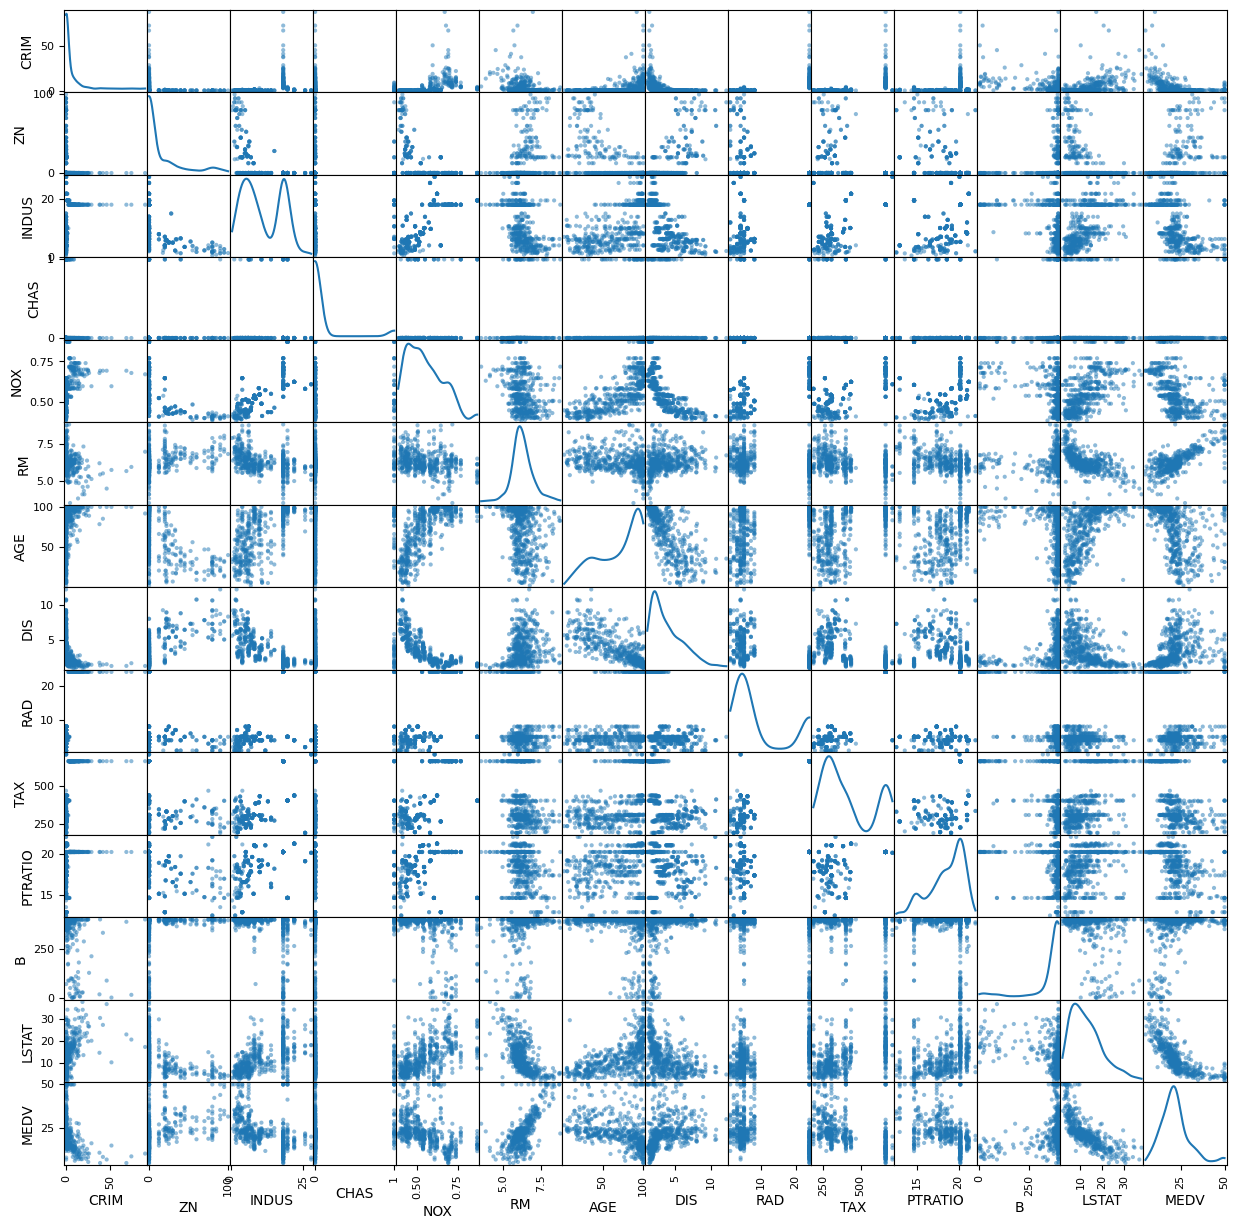

In [73]:
# Vemos la correlación de los atributos utilizando scatter matrix de pandas
pd.plotting.scatter_matrix(data_copy, figsize=(15, 15), diagonal='kde')
plt.show()

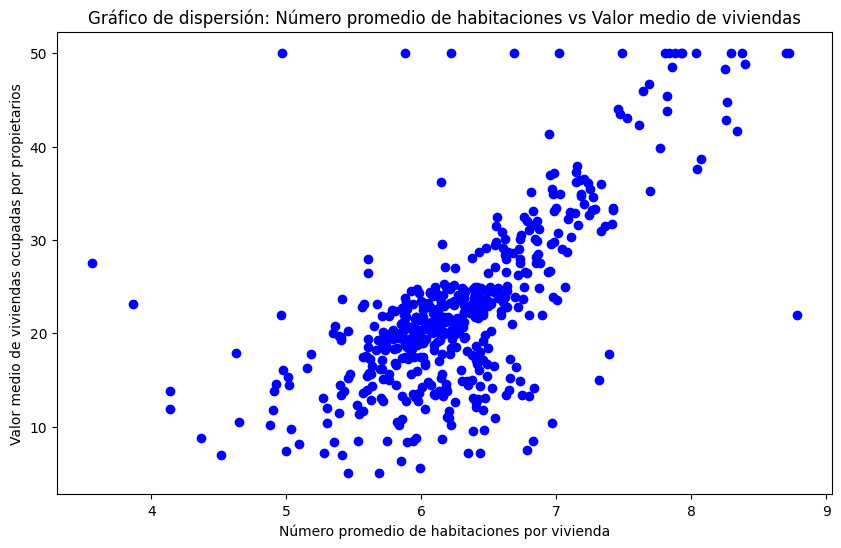

In [74]:
# Gráfico de dispersión de los datos
plt.figure(figsize=(10, 6))
plt.scatter(data_copy['RM'], data_copy['MEDV'], color='blue')
plt.xlabel('Número promedio de habitaciones por vivienda')
plt.ylabel('Valor medio de viviendas ocupadas por propietarios')
plt.title('Gráfico de dispersión: Número promedio de habitaciones vs Valor medio de viviendas')
plt.show()


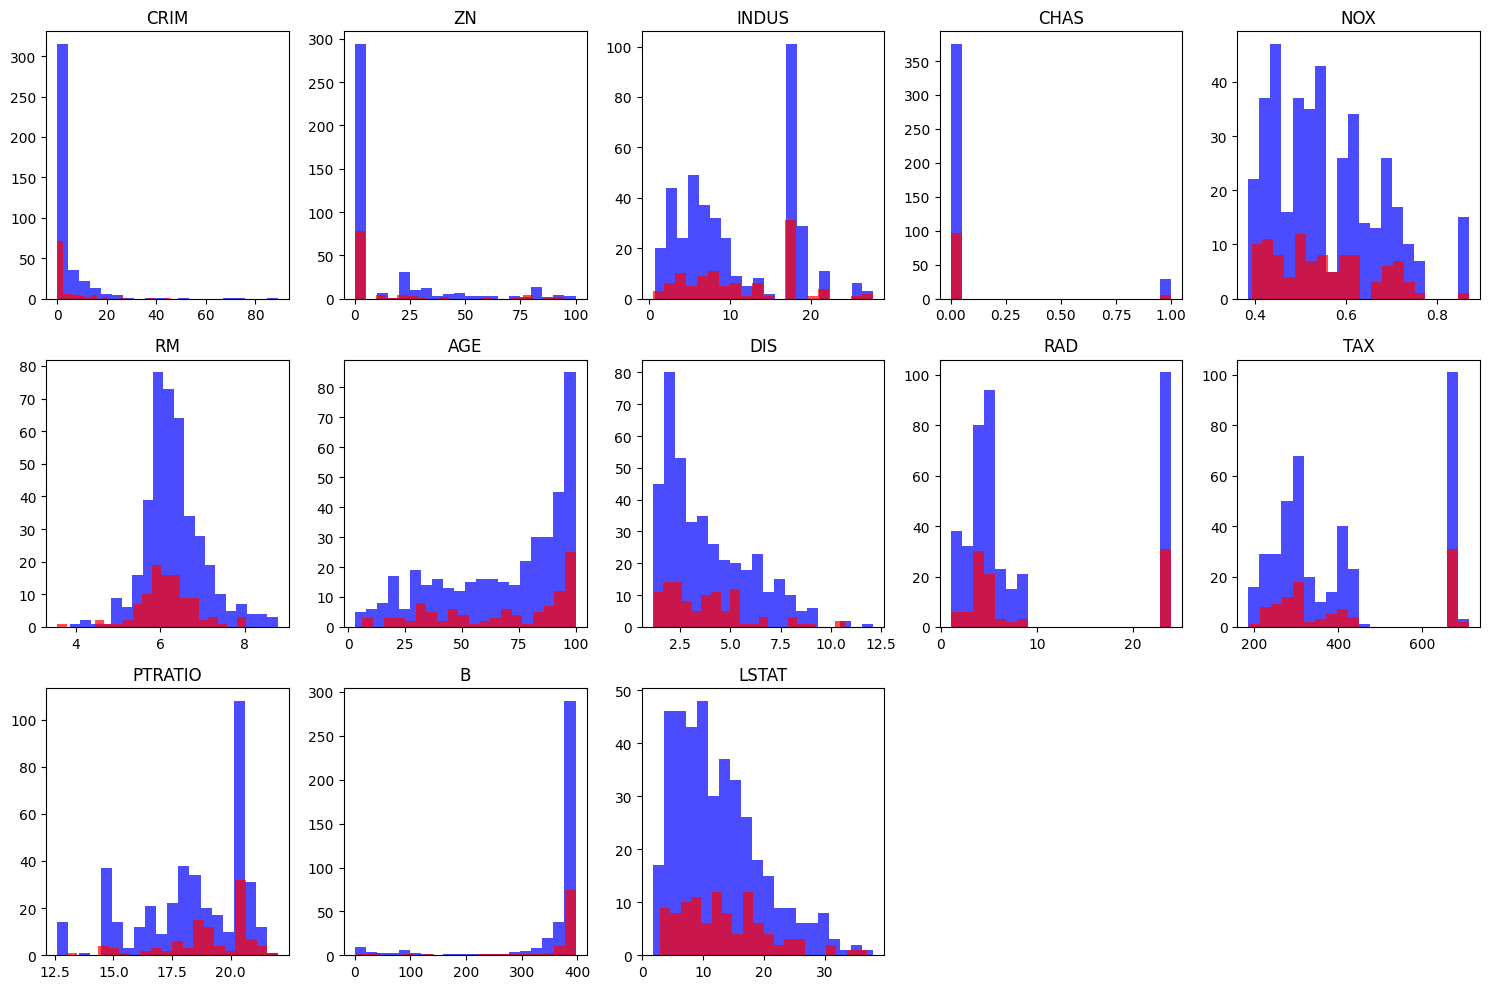

In [75]:
# Train test split para dividir el conjunto de datos
X = data_copy.drop('MEDV', axis=1)
y = data_copy['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Matriz de histogramas
plt.figure(figsize=(15, 10))
for i, column in enumerate(X_train.columns):
    plt.subplot(3, 5, i + 1)
    plt.hist(X_train[column], bins=20, color='blue', alpha=0.7)
    plt.hist(X_test[column], bins=20, color='red', alpha=0.7)
    plt.title(column)
plt.tight_layout()
plt.show()


In [76]:
# Análisis de valores atípicos
for k, v in data_copy.items():
    # Calculamos el primer cuartil
    q1 = v.quantile(0.25)
    # Calculamos el tercer cuartil
    q3 = v.quantile(0.75)
    # Rango intercuartílico (IRQ)
    irq = q3 - q1
    # Filtra los valores atípicos en la columna v
    v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
    # Calcula el porcentaje de valores atípicos en la columna v
    perc = np.shape(v_col)[0] * 100.0 / np.shape(data_copy)[0]
    # Imprime el nombre de la columna (k) y el porcentaje de valores atípicos (perc)
    print("Columna %s valores atípicos= %.2f%%" % (k, perc))


Columna CRIM valores atípicos= 13.04%
Columna ZN valores atípicos= 13.44%
Columna INDUS valores atípicos= 0.00%
Columna CHAS valores atípicos= 100.00%
Columna NOX valores atípicos= 0.00%
Columna RM valores atípicos= 5.93%
Columna AGE valores atípicos= 0.00%
Columna DIS valores atípicos= 0.99%
Columna RAD valores atípicos= 0.00%
Columna TAX valores atípicos= 0.00%
Columna PTRATIO valores atípicos= 2.96%
Columna B valores atípicos= 15.22%
Columna LSTAT valores atípicos= 1.38%
Columna MEDV valores atípicos= 7.91%


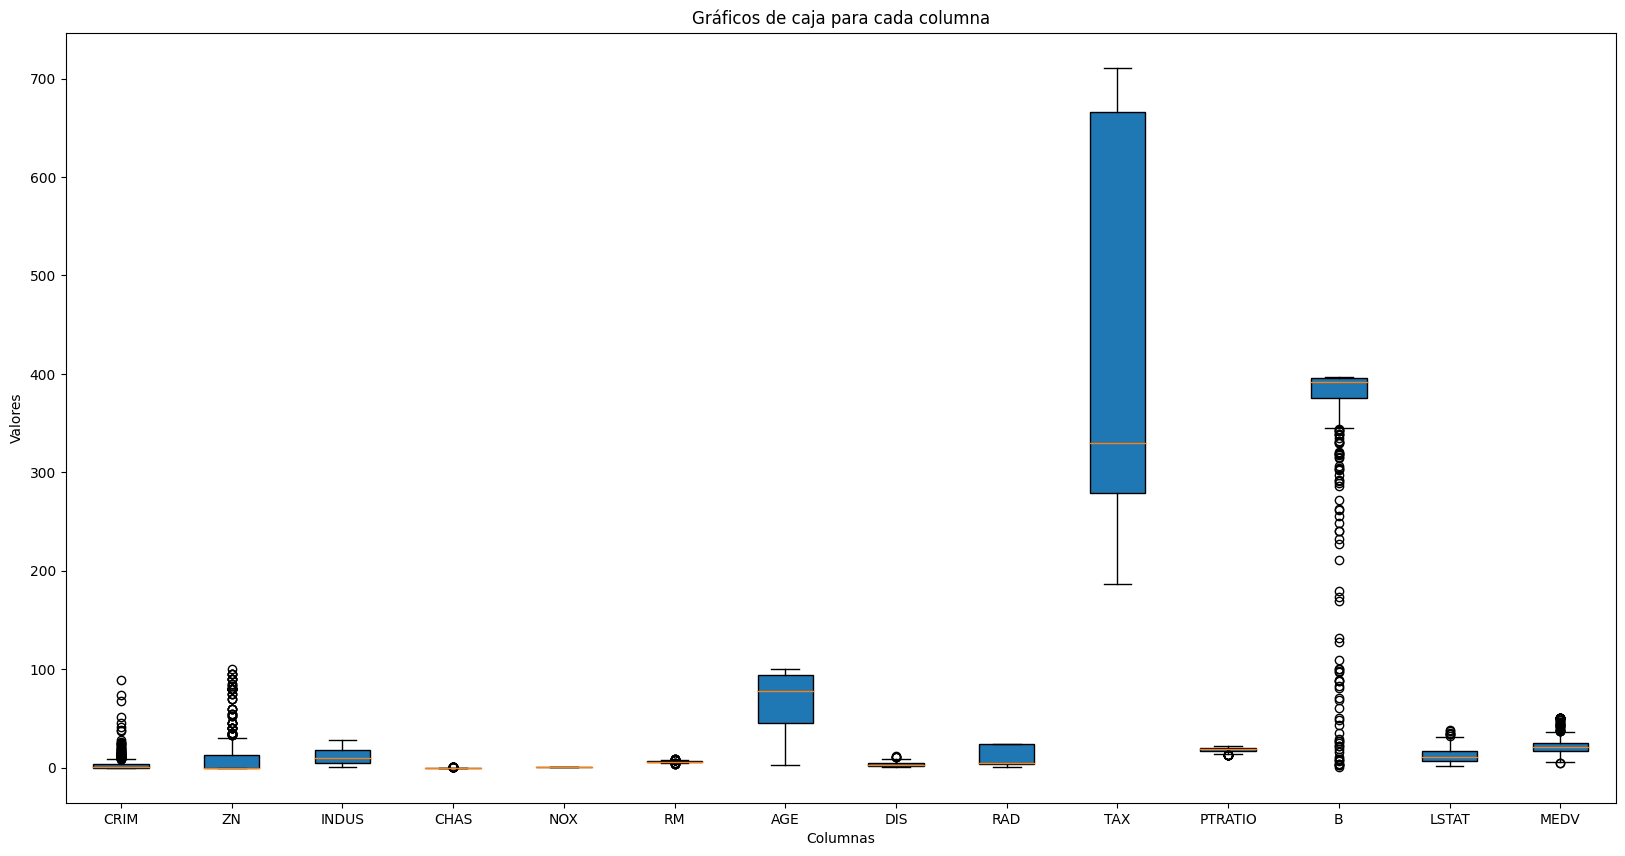

In [77]:
# Crear una figura con subplots
plt.figure(figsize=(20, 10))
plt.boxplot(data_copy, patch_artist=True, labels=data_copy.columns)
plt.xlabel('Columnas')
plt.ylabel('Valores')
plt.title('Gráficos de caja para cada columna')
plt.show()


In [78]:
# Escalado de columnas
min_max_scaler = preprocessing.MinMaxScaler()

# Selección de columnas
column_sels = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']

# Obtención de las columnas seleccionadas y la variable objetivo
x = data_copy.loc[:, column_sels]
y = data_copy['MEDV']

# Escalado de las columnas seleccionadas
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)


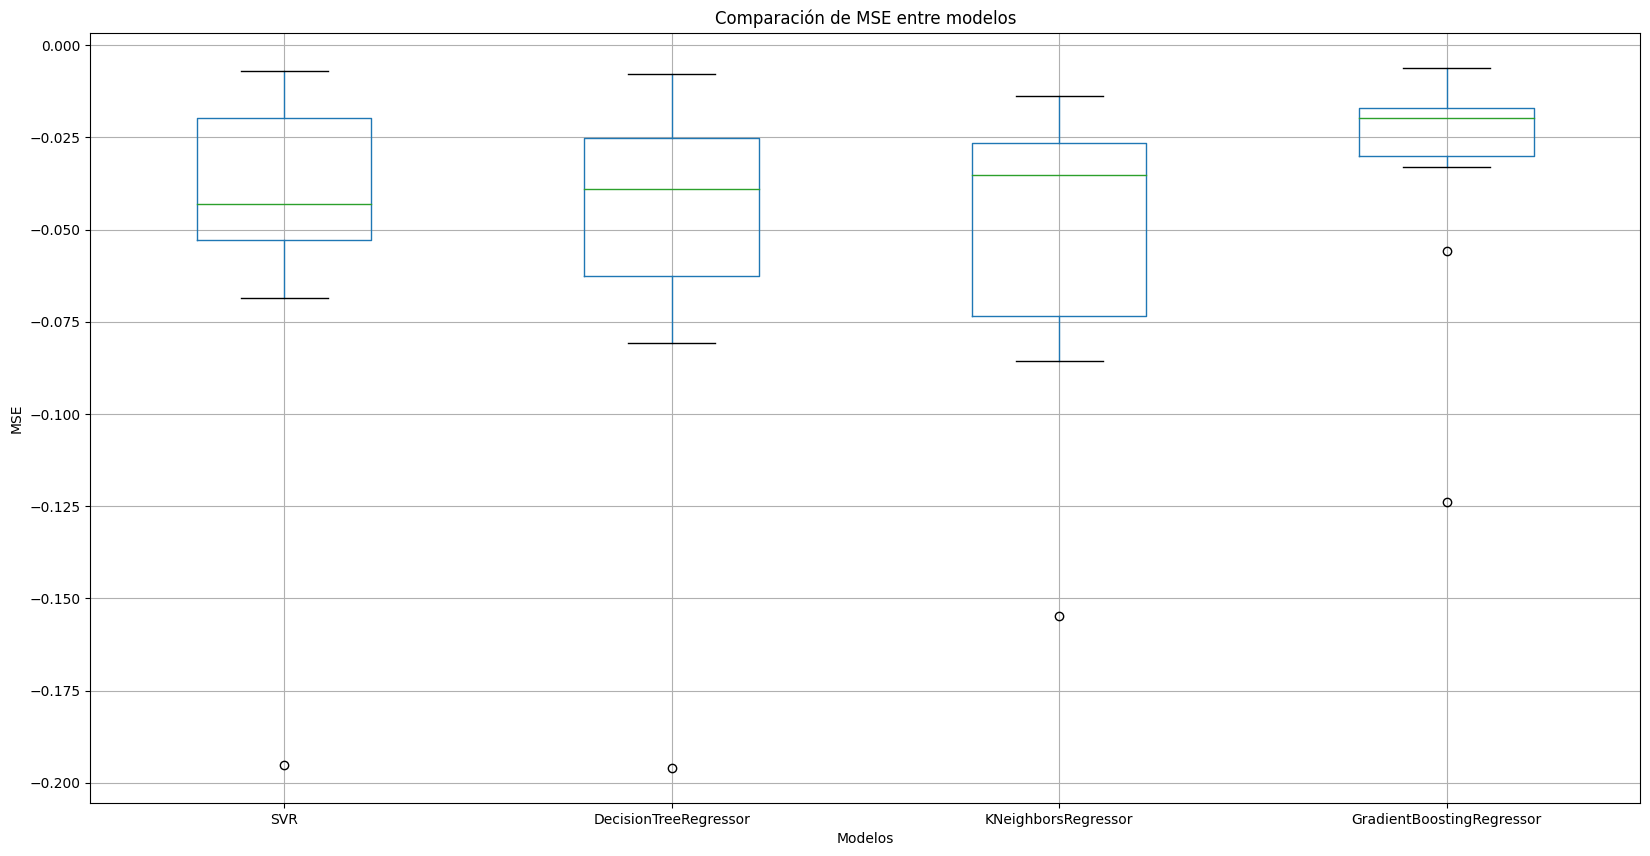

In [79]:
# Creación de la figura
plt.figure(figsize=(20, 10))

# Creación del gráfico de caja (boxplot) utilizando los datos almacenados en scores_map
scores_map = pd.DataFrame(scores_map)
scores_map.boxplot()

# Configuración de etiquetas y título del gráfico
plt.xlabel('Modelos')
plt.ylabel('MSE')
plt.title('Comparación de MSE entre modelos')

# Mostrar el gráfico
plt.show()


In [80]:
# Verificar valores nulos
data_copy.isnull().sum()


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64